<a href="https://www.kaggle.com/code/sameerprogrammer/model-multiple-algo-pipeline?scriptVersionId=183438425" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import set_config

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

In [2]:
set_config(display='diagram')

In [3]:
df = pd.read_csv("/kaggle/input/moscow-housing-price-dataset/data.csv")
df.head(5)

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5,Without renovation


price --> y column
               
### Apartment type:-        odinal encoding    
### Metro station:-         not using


### Region:-                nominal encoding      
*      Moscow           16113                 
*      Moscow region     6563             
     


### Renovation:-            nomial encoding                
*      Cosmetic                     12788             
*      European-style renovation     3666           
*      Without renovation            3198             
*      Designer                      3024


### what i use for this project
1.      OrdinalEncoder
1.       NominalEncoder
1.       StandardScaler
1.       FunctionTransfomer
1.       PowerTransformer
1.       ColumnTransfomer
1.       Pipeline
1.       LinearRegression
1.       RainForestRegressor

In [4]:
#  remove unwanted columns 

df = df.drop(["Metro station"], axis=1)
df.head(5)

,Price,Apartment type,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5,Without renovation


### Plot different graph to find outliers

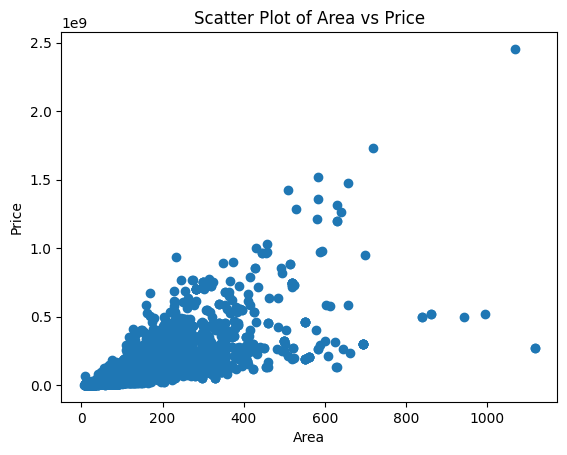

In [5]:
plt.scatter(df["Area"], df["Price"])
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Scatter Plot of Area vs Price")
plt.show()

In [6]:
# We can see that in Area vs Price graph there many value which are very far from normal value. 
# So, it might effect our model preformance

df = df[(df["Area"] < 800) & (df["Price"] < 1500000000)]
df.shape

(22665, 11)

### getting X and y Columns for train_test_split

In [7]:
X = df.iloc[: , 1:]
y = df["Price"]

X.shape, y.shape

((22665, 10), (22665,))

### train, test and split

In [8]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((18132, 10), (4533, 10), (18132,), (4533,))

In [9]:
def graph(col):
    plt.figure(figsize=[14,4])

    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)  # Use sns.histplot() instead of sns.displot()
    plt.title(f'{col} PDF')

    plt.subplot(122)
    stats.probplot(X_train[col], dist='norm', plot=plt)
    plt.title(f'{col} QQ plot')

    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


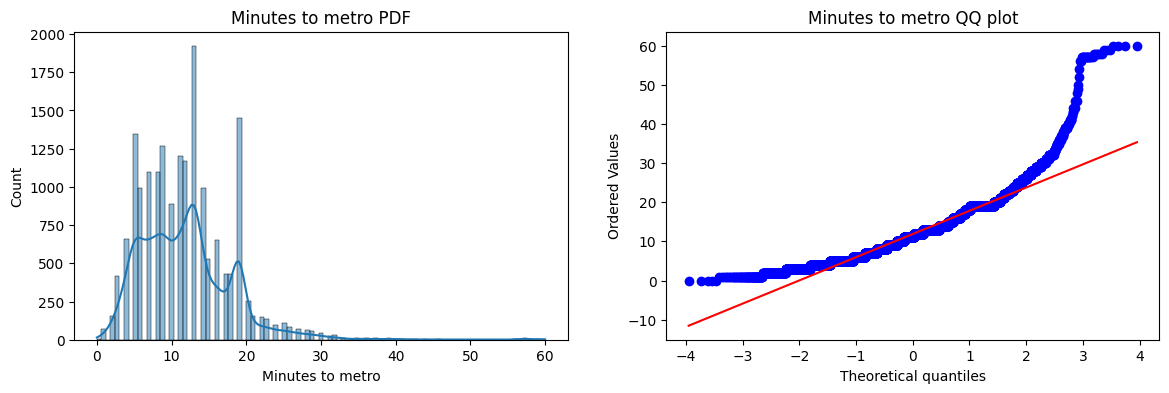

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


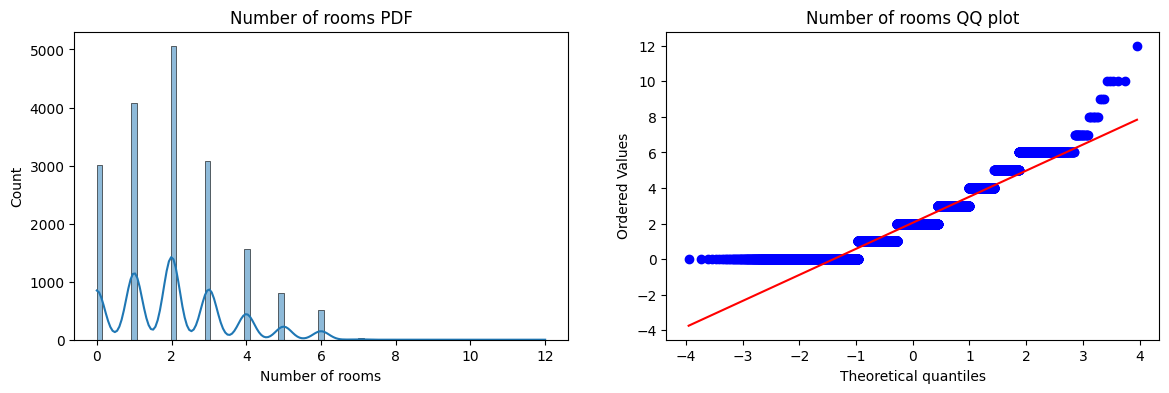

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


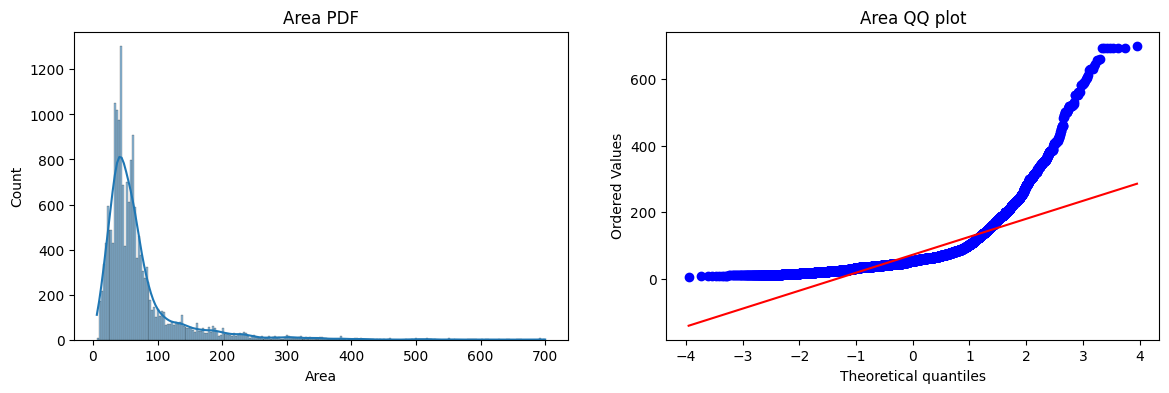

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


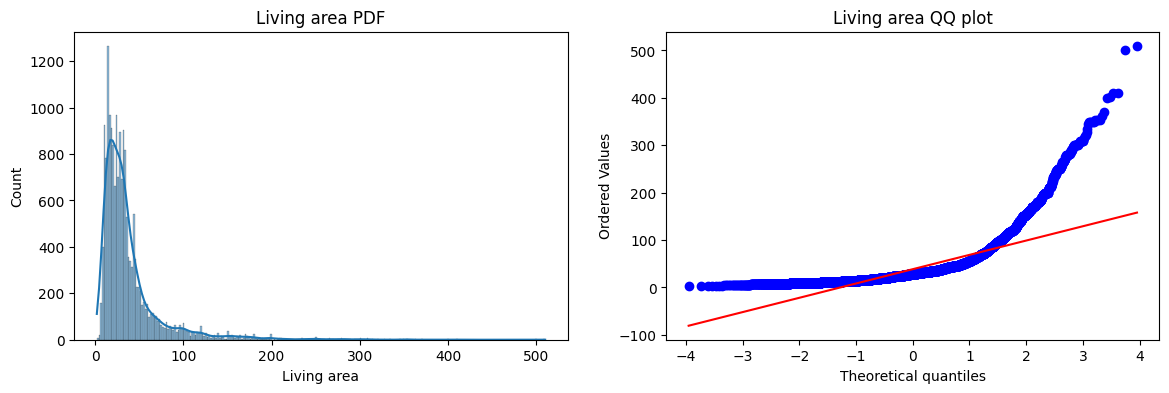

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


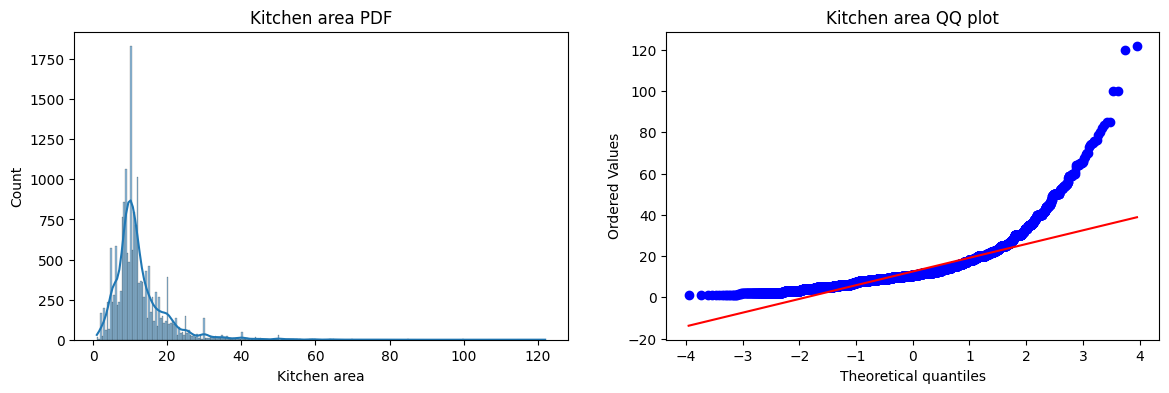

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


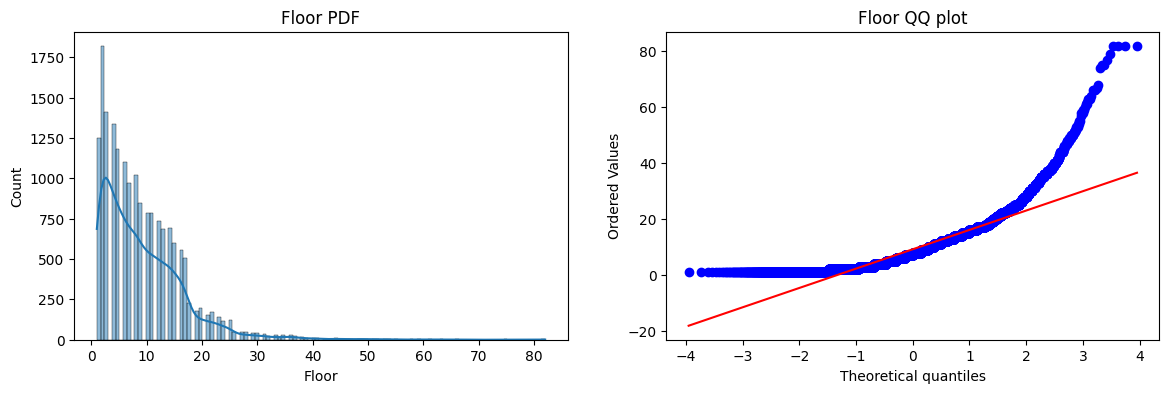

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


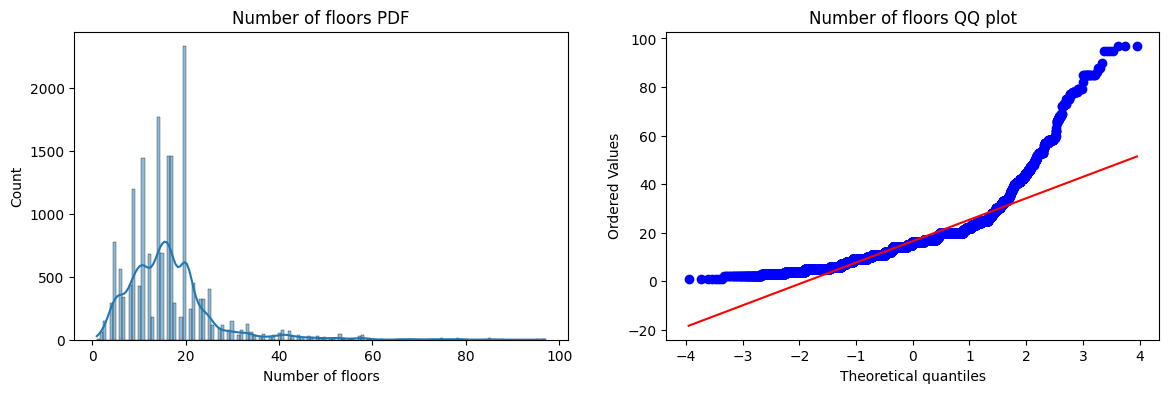

In [10]:
X_train_num = X_train.select_dtypes(include=[np.int64, np.float64])

for col in X_train_num.columns:
    graph(col)

**testing PowerTransformer**

In [11]:
pt1 = PowerTransformer()
pt1.fit_transform(X_train_num)

array([[ 1.39045416,  0.72332067,  0.30658551, ...,  0.17633759,
         1.13680435,  1.02403431],
       [ 0.49898644, -1.62656329, -1.33810993, ..., -0.47203037,
        -0.1973481 ,  0.58694035],
       [ 1.15992984,  0.13572054,  0.35630066, ...,  0.20863926,
        -0.1973481 , -0.51630629],
       ...,
       [ 0.7802573 , -0.59633853, -0.61480042, ..., -0.17927532,
         0.14768911, -0.86299705],
       [-1.2948847 ,  2.05473316,  1.80772813, ...,  1.17531686,
        -1.30987695, -1.80231554],
       [ 1.15992984, -1.62656329, -1.0051291 , ..., -0.38396053,
        -0.01489932, -0.51630629]])

**testing FunctionTransformer**

In [12]:
# Selecting numerical columns
numeric_columns = X_train.select_dtypes(include=[np.number]).columns

# Defining the transformer pipeline
ft = FunctionTransformer(func=np.log1p)
trf = ColumnTransformer(transformers=[
    ('log_transform', ft, numeric_columns)
], remainder='passthrough')

# Transforming the data
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

pd.DataFrame(X_train_transformed).head(5)

,0,1,2,3,4,5,6,7,8,9
0,3.091042,1.386294,4.191169,3.583519,2.564949,2.890372,3.258097,Secondary,Moscow,Without renovation
1,2.70805,0.0,3.208825,2.714695,2.261763,1.94591,3.044522,New building,Moscow region,Cosmetic
2,2.995732,1.098612,4.224642,3.616309,2.580217,1.94591,2.484907,New building,Moscow,Cosmetic
3,1.94591,1.609438,5.521461,5.01728,2.772589,1.098612,1.94591,Secondary,Moscow,Designer
4,2.079442,1.609438,4.576771,4.258446,2.397895,1.791759,1.791759,Secondary,Moscow,European-style renovation


In [13]:
def graph_QQ(X_train_t, col):

    plt.figure(figsize=[14,4])

    plt.subplot(121)
    stats.probplot(X_train[col], dist='norm', plot=plt)  
    plt.title(f'Before {col} QQ plot')

    plt.subplot(122)

    stats.probplot(X_train_t[col], dist='norm', plot=plt)
    plt.title(f'After {col} QQ plot')

    plt.show()

In [14]:
def complete(Transformer, algo):

    trf1 = ColumnTransformer(transformers=[
        ('pt/ft', Transformer, [1,3,4,5,6,7,8])
    ], remainder='passthrough')
    
    trf2 = ColumnTransformer(transformers=[
        ("oe", OrdinalEncoder(
            categories=[["New building", "Secondary"]],
            handle_unknown='use_encoded_value',
            unknown_value=np.nan
        ), [7]),
        ("ohe", OneHotEncoder(sparse_output=False, drop='first', handle_unknown="ignore"), [8, 9])
    ], remainder='passthrough')
    
    trf3 = ColumnTransformer(transformers=[
        ("StandardScaler",StandardScaler(), slice(0,12))
    ],remainder='passthrough')
    
    
    Pline = Pipeline([
        ("trf1", trf1),
        ("trf2", trf2),
        ("trf3", trf3),
        ("model" ,algo) 
    ])
    
    
    Pline.fit(X_train, y_train)
    # Predict
    y_pred = Pline.predict(X_test)
    
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Cross-validation
    cvs = cross_val_score(Pline, X_train, y_train, cv=10)  # Change cv=10 to desired number of folds
    
    print(f'R^2 Score: {r2}')
    print(f'Mean Squared Error: {mse}')
    print(f'Cross Validation Score: {cvs.mean()}')
#     print(Pline.named_steps)

In [15]:
def all(transformer, algo):
    complete(transformer, algo)
    
    X_train_t = transformer.fit_transform(X_train_num)
    
    # Check if the transformer is not PowerTransformer
    if transformer == FunctionTransformer():
        for col in X_train_t.columns:
            graph_QQ(X_train_t, col)


In [16]:
# Define Random Forest Regressor
linear_regression = LinearRegression()
rf_regressor = RandomForestRegressor(n_estimators=150, random_state=42)

ft = FunctionTransformer(func = np.log1p)
pt = PowerTransformer(method='yeo-johnson')

all(pt, linear_regression)

R^2 Score: 0.45727082805532804
Mean Squared Error: 3016509393735354.5
Cross Validation Score: 0.4406254000282542
